# FINAL PROJECT: MACHINE LEARNING APPLICATIONS

In this project, students will use the knowledge and techniques acquired during
the course to solve a machine learning task on text documents. Students can
work in groups of a maximum of four people. It is important that, regardless
of how each group chooses to distribute the work, all the components of the
group know the complete project. The evaluation of the final project will be
carried out through the delivery of a report and a group presentation followed
by questions.

The project consists of the following tasks:

• Task 1. Natural Language Processing and text vectorization

• Task 2. Machine Learning:

– Task 2.1. Classification, Regression using feature extraction or selection techniques

– Task 2.2. Clustering using feature extraction or selection techniques

– Task 2.3. Recommendation Systems

• Task 3. Implementation of a dashboard using the Python Dash library.

• Task 4. Final report and presentation.

For the execution of the final project, students must choose to implement
any of the sub-Tasks 2 (either 2.1, 2.2 or 2.3), depending on their preferences
and the possibilities of the database used.

Done by:

Carolina López De La Madriz 100475095

Álvaro Martín Ruiz 100475---

Emma Rodríguez Hervás 100475---

Jaime Salafranca Pardo 100475216

## DATASET AND IMPORTS

In [1]:
import pandas as pd
import numpy as np
import pycaret as pc


In [2]:
df = pd.read_csv('fake_or_real_news.csv', index_col = 0)
#df = pd.read_csv('./datasets/fake_or_real_news.csv', index_col = 0) if run in local

## EXPLORATORY DATA ANALYSIS

In [3]:
df.head()

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# set the label class to 1 and 0
df['label'] = df['label'].replace({'REAL': 1, 'FAKE': 0})
df.head(5)

,title,text,label
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [12]:
df['text'].isnull().sum()

0

In [13]:
df['text'].isna().sum()

0

In [14]:
# distribution os the labels
df['label'].value_counts()

,count
label,
1,3171
0,3164


In [5]:
df_reduced = df.sample(n=1000, random_state=42)

## Task 1. Natural Language Processing and text vectorization

This task will consist of the thematic analysis of the collection provided. The
steps you must follow in your work are as follows:

• Step 1: Implementation of a pipeline for the preprocessing of the texts.
For this task you could use SpaCy, or any other library that you consider
appropriate.

• Step 2: Text vectorization. In this stage you will analyze the following
vectorization schemes:

– Classical BoW or TF-IDF representation.

– Word2vec/Glove based representation or Doc2Vec vectorization.

– Extraction of themes and vector representation of the documents
using the LDA algorithm.

In the report you must include a description of the preprocessing pipeline
used as well as the vectorization strategies that have been explored. For instance, in the Word2vec/FastText based representations you must explain how
you convert a set of word vectors into a document vectorization or for the topic
model you have to explain how you have carried out the selection of the number
of topics. Any additional representation which helps to analyze this vectorization will be welcome (and positively evaluated).

In [18]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.3 MB/s eta 0:00:00


In [6]:
import spacy
import gensim
from gensim.models import Word2Vec

In [7]:
nlp = spacy.load('en_core_web_sm')

In [8]:
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

In [11]:
df_reduced['clean_text'] = (df_reduced['title'] + " " + df_reduced['text']).apply(preprocess)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf.fit_transform(df_reduced['clean_text'])


In [15]:
import gensim.downloader as api
from numpy import mean, zeros

# Usar modelo preentrenado (ej: GloVe)
w2v = api.load("glove-wiki-gigaword-100")

def document_vector(doc):
    words = doc.split()
    vecs = [w2v[word] for word in words if word in w2v]
    return mean(vecs, axis=0) if vecs else zeros(100)

df_reduced['w2v_vector'] = df_reduced['clean_text'].apply(document_vector)


In [24]:
from gensim import corpora, models

texts = [text.split() for text in df_reduced['clean_text']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)

# Vectorización: representación del documento según distribución de tópicos
lda_vectors = [lda.get_document_topics(bow) for bow in corpus]


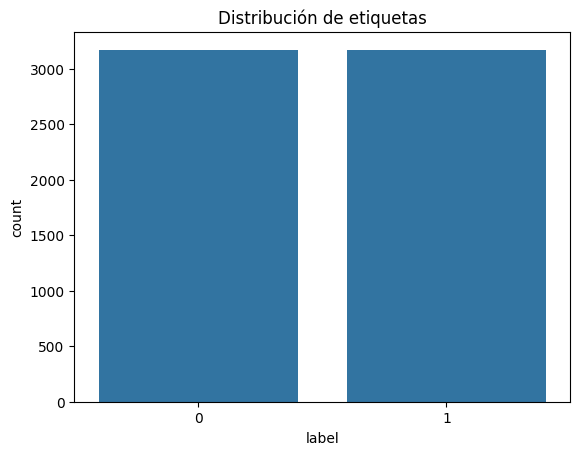

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='label')
plt.title("Distribución de etiquetas")
plt.show()


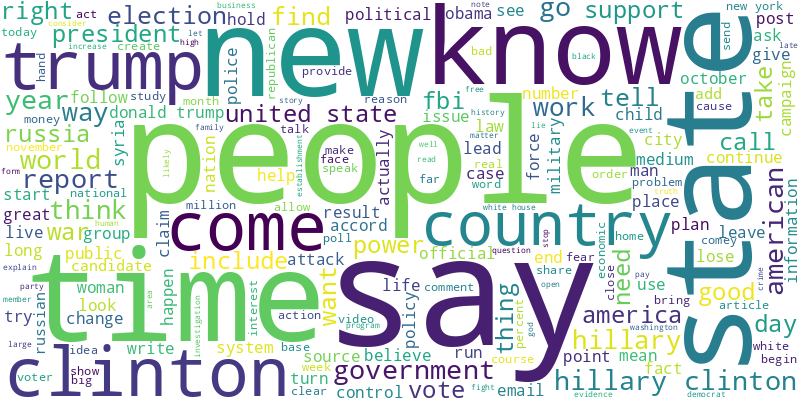

In [18]:
from wordcloud import WordCloud

text_fake = " ".join(df_reduced[df_reduced.label == 0]['clean_text'])
text_real = " ".join(df_reduced[df_reduced.label == 1]['clean_text'])

# FAKE
WordCloud(width=800, height=400, background_color='white').generate(text_fake).to_image()
# REAL



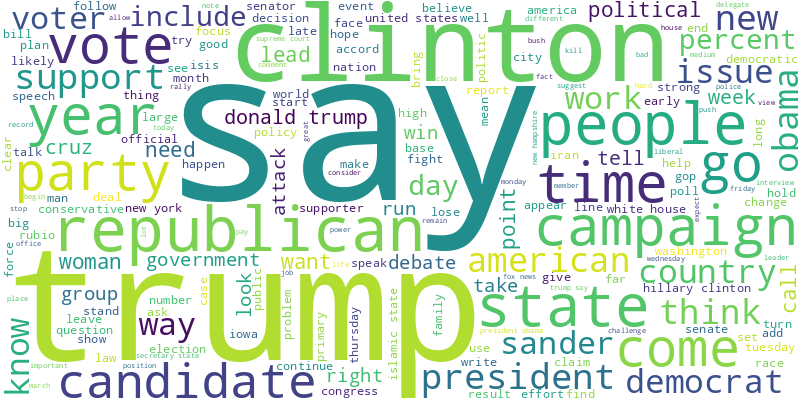

In [19]:
WordCloud(width=800, height=400, background_color='white').generate(text_real).to_image()

In [21]:
!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.6 MB/s eta 0:00:00


In [25]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_display = gensimvis.prepare(lda, corpus, dictionary)
pyLDAvis.display(lda_display)


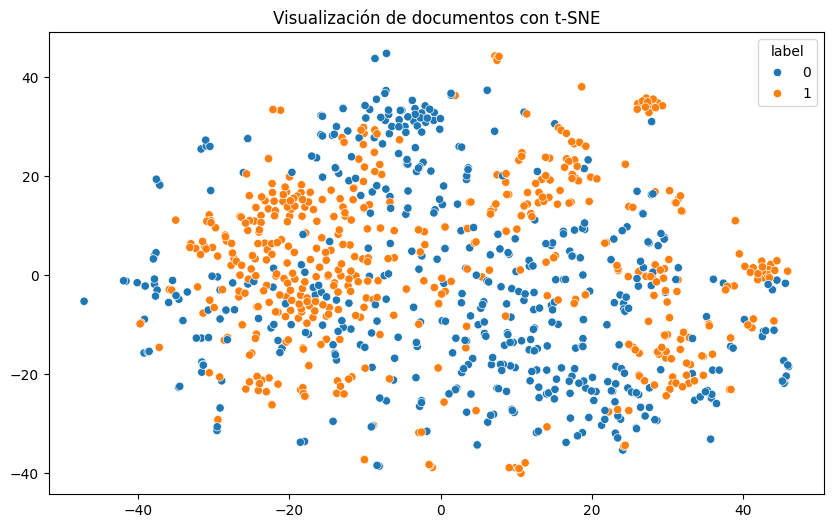

In [27]:
from sklearn.manifold import TSNE

# Asumiendo que tienes tfidf_matrix o w2v_matrix
X_embedded = TSNE(n_components=2).fit_transform(tfidf_matrix.toarray())

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=df_reduced['label'])
plt.title("Visualización de documentos con t-SNE")
plt.show()


In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar(lda_model, corpus, doc_index):
    topic_dist = dict(lda_model.get_document_topics(corpus[doc_index], minimum_probability=0))
    topics = [f"Topic {i}" for i in range(lda_model.num_topics)]
    values = [topic_dist.get(i, 0) for i in range(lda_model.num_topics)]

    # Radar necesita cerrar el círculo, así que repetimos el primer valor
    values += values[:1]
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=True)

    # Crear el gráfico
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Doc {doc_index}')
    ax.fill(angles, values, alpha=0.25)

    # Configurar ejes
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(topics, fontsize=10)
    ax.set_yticklabels([])
    ax.set_title(f"Distribución de Tópicos - Documento {doc_index}", size=14, pad=20)

    plt.show()



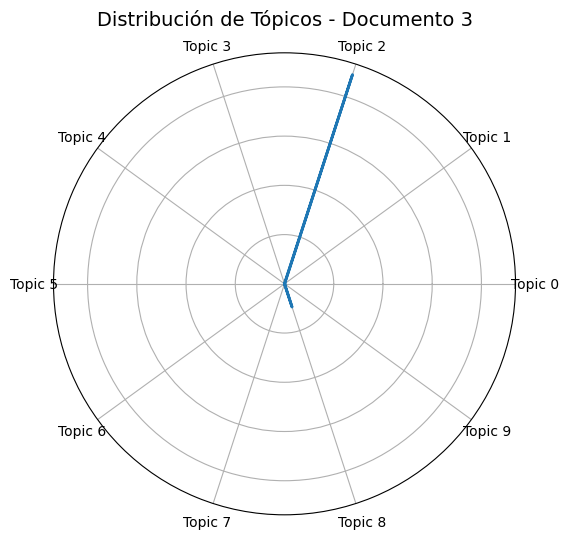

In [32]:
plot_radar(lda, corpus, doc_index=3)  # Elige el índice del documento que quieras visualizar


In [33]:
# Ver las 10 palabras más importantes de cada tópico
for topic_id, topic_words in lda.print_topics(num_topics=lda.num_topics, num_words=10):
    print(f"🟢 Topic {topic_id}: {topic_words}")


🟢 Topic 0: 0.006*"year" + 0.006*"drug" + 0.005*"new" + 0.005*"say" + 0.005*"obama" + 0.004*"like" + 0.004*"state" + 0.004*"people" + 0.004*"government" + 0.003*"americans"
🟢 Topic 1: 0.006*"state" + 0.005*"world" + 0.004*"say" + 0.004*"like" + 0.003*"people" + 0.003*"execution" + 0.003*"year" + 0.003*"drug" + 0.003*"political" + 0.003*"time"
🟢 Topic 2: 0.025*"trump" + 0.019*"clinton" + 0.016*"say" + 0.008*"campaign" + 0.007*"state" + 0.007*"republican" + 0.006*"candidate" + 0.006*"election" + 0.006*"voter" + 0.006*"hillary"
🟢 Topic 3: 0.006*"russia" + 0.005*"syria" + 0.005*"woman" + 0.004*"fly" + 0.004*"zone" + 0.004*"aleppo" + 0.004*"vitamin" + 0.004*"say" + 0.003*"people" + 0.003*"military"
🟢 Topic 4: 0.008*"say" + 0.007*"obama" + 0.006*"people" + 0.006*"year" + 0.004*"president" + 0.004*"want" + 0.004*"time" + 0.003*"come" + 0.003*"war" + 0.003*"like"
🟢 Topic 5: 0.011*"party" + 0.010*"trump" + 0.009*"delegate" + 0.009*"percent" + 0.005*"political" + 0.005*"win" + 0.005*"state" + 0.0

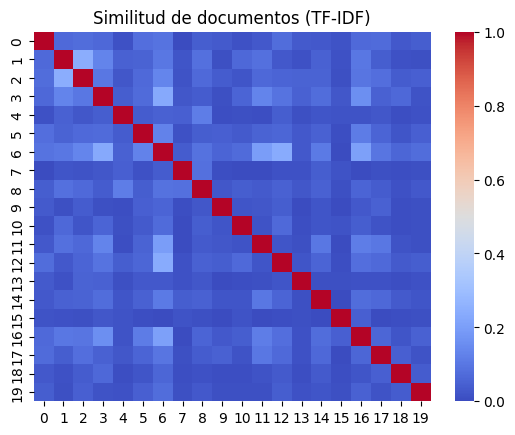

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

similarity_matrix = cosine_similarity(tfidf_matrix)
sns.heatmap(similarity_matrix[:20,:20], cmap="coolwarm")
plt.title("Similitud de documentos (TF-IDF)")
plt.show()


## Task 2. Machine Learning

### Task 2.1. Classification, Regression using feature extraction or selection techniques

Implementation and evaluation of the performance of a classifier or regression
model for the selected dataset. Use one of the metadata available in the dataset
as your target variable: a categorical variable if you opt for a classification task,
or a real type variable for regression. Note that discrete but ordered variables
(such as dates, scores, etc.) can also be used as target variables for a regression
task.

For this task, you will need to compare the performance by using the different
document vectorizations. In addition, you must use for your work some of the
feature extraction or selection algorithms described in the course, analyzing
their impact on the results obtained. Use the usual metrics for performance
analysis, i.e., error rates, ROC curves, confusion matrices, etc., if you pose
a classification task, or the root mean square error if you choose a regression
model.

To adjust the hyperparameters of the classification or regression models, you
must use a validation methodology that must also be explained in the report.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE



==== Logistic Regression ====
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        95
           1       0.93      0.88      0.90       105

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

ROC AUC: 0.9754385964912281


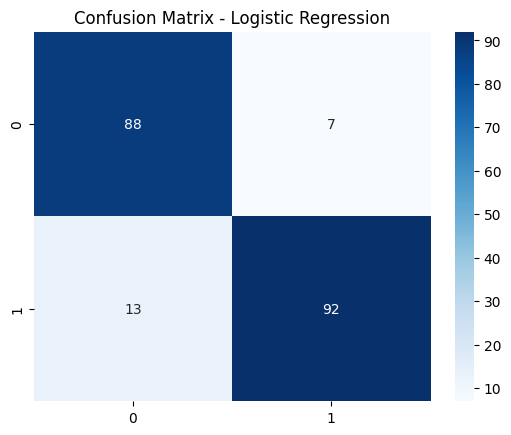



==== Random Forest ====
              precision    recall  f1-score   support

           0       0.86      0.94      0.89        95
           1       0.94      0.86      0.90       105

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

ROC AUC: 0.947468671679198


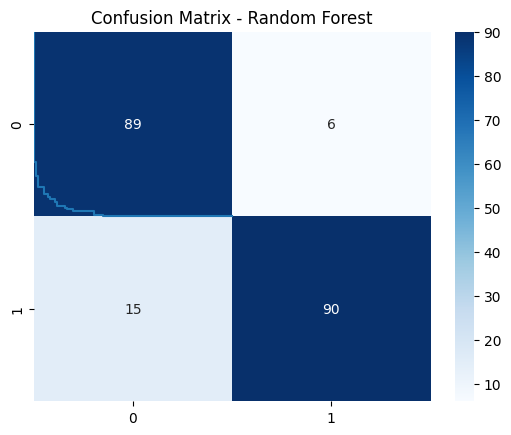



==== SVM ====
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        95
           1       0.94      0.90      0.92       105

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

ROC AUC: 0.9789974937343358


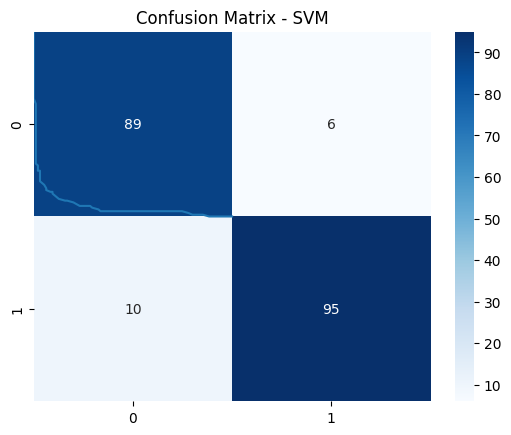

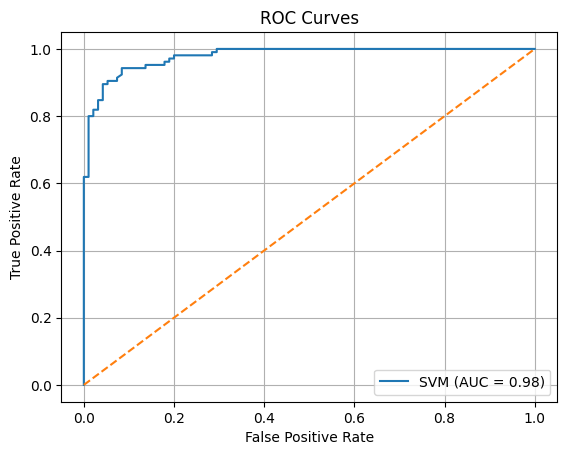

In [36]:

# Vectorización TF-IDF
tfidf = TfidfVectorizer(max_features=3000)
X_tfidf = tfidf.fit_transform(df_reduced["clean_text"])
y = df_reduced["label"]
# Selección de características
selector = SelectKBest(chi2, k=1000)
X_selected = selector.fit_transform(X_tfidf, y)

# Entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(probability=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    print(f"\n\n==== {name} ====")
    print(classification_report(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_proba))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()



### Task 2.2. Clustering using feature extraction or selection techniques

In case the dataset does not have a clear variable that can be used for document
classification or to solve a regression problem, this task can be approached as
an unsupervised learning task and document clustering can be performed.

In this case the clustering results obtained using the different vectorizations
obtained from the previous task should be explored. To analyze and compare
the results with each other, measures based on clustering consistency such as
the silhouette coefficient1
can be used or an analysis of the obtained clusters
(centroids and distribution of documents in each cluster) can be carried out.

For the selection of the optimal number of centroids, the analysis of the
silhouette coefficient or other measures specific to the particular algorithm (e.g.
the sum of squared distances of samples to their closest cluster center for the
K-means) can also be used.
In addition, you must include here some of the feature extraction or selection
algorithms described in the course, analyzing their impact on the clustering
results.


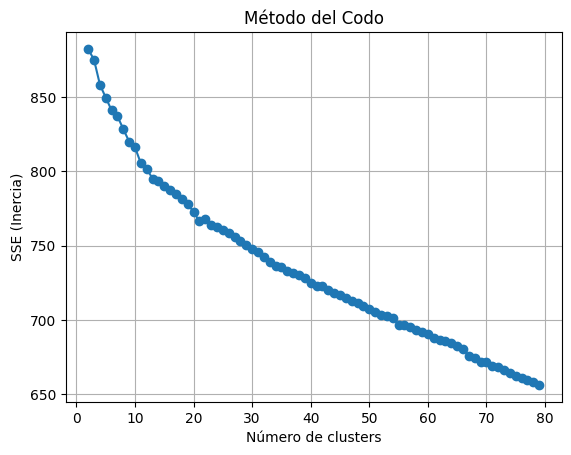

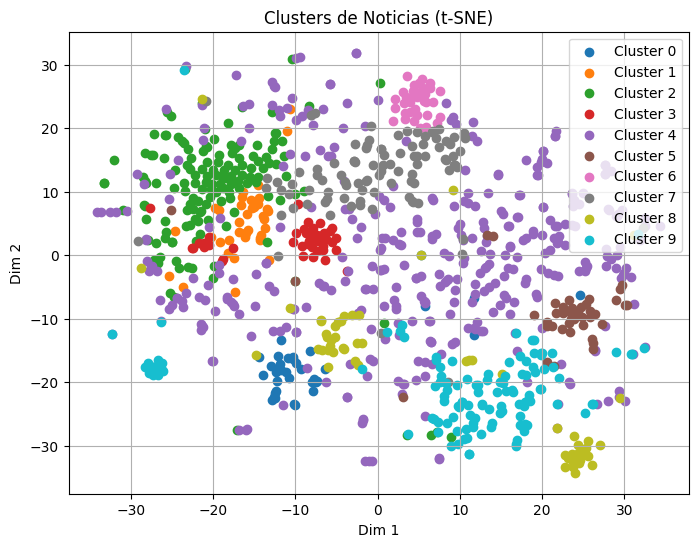

Silhouette Score: 0.018


In [42]:
# === TASK 2.2: Clustering de Noticias ===

# Vectorización para clustering
X_cluster = TfidfVectorizer(max_features=1000).fit_transform(df_reduced["clean_text"])

# Método del codo
sse = []
for k in range(2, 80):
    km = KMeans(n_clusters=k, random_state=42).fit(X_cluster)
    sse.append(km.inertia_)

plt.plot(range(2,80), sse, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("SSE (Inercia)")
plt.title("Método del Codo")
plt.grid()
plt.show()

# Elegimos k=4 como ejemplo
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
df_reduced['cluster'] = kmeans.fit_predict(X_cluster)

# Visualización t-SNE
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_results = tsne.fit_transform(X_cluster.toarray())

plt.figure(figsize=(8,6))
for c in range(k):
    plt.scatter(tsne_results[df_reduced.cluster == c, 0], tsne_results[df_reduced.cluster == c, 1], label=f"Cluster {c}")
plt.legend()
plt.title("Clusters de Noticias (t-SNE)")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid()
plt.show()

# Evaluación de clustering
score = silhouette_score(X_cluster, df_reduced["cluster"])
print(f"Silhouette Score: {score:.3f}")

### Task 2.3. Recommendation Systems

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

# Función para predecir si una noticia es FAKE o REAL
def predecir_noticia(texto):
    texto_preprocesado = preprocess(texto)  # Preprocesamiento
    vectorizado = tfidf.transform([texto_preprocesado])  # Vectorización
    prediccion = models["Logistic Regression"].predict(vectorizado)
    return "FAKE" if prediccion == 0 else "REAL"

# Función para recomendar noticias contrarias
def recomendar_similares(texto, top_n=3):
    # Predecir si la noticia es FAKE o REAL
    prediccion = predecir_noticia(texto)
    print(f"Predicción: {prediccion}")

    # Vectorizar la noticia
    texto_preprocesado = preprocess(texto)
    vectorizado = tfidf.transform([texto_preprocesado])

    # Calcular similitudes entre la noticia y las demás
    similitudes = cosine_similarity(vectorizado, X_tfidf).flatten()

    # Buscar noticias contrarias (si la noticia es FAKE, buscamos REAL)
    if prediccion == "FAKE":
        recomendaciones = df[y == 1]  # Selecciona las noticias REAL
    else:
        recomendaciones = df[y == 0]  # Selecciona las noticias FAKE

    # Ordenar por similitud
    idx_recomendados = np.argsort(similitudes)[::-1][1:top_n+1]  # Ignorar la misma noticia
    recomendados = recomendaciones.iloc[idx_recomendados]

    return recomendados[['title', 'label']], similitudes[idx_recomendados]

# Ejemplo de recomendación
texto_noticia = "Your input text here to predict and recommend news"
recomendados, similitudes = recomendar_similares(texto_noticia)
print("Recomendaciones:")
for i, (title, label) in enumerate(recomendados.itertuples(index=False), 1):
    print(f"{i}. {title} - {label} (Similitud: {similitudes[i-1]:.2f})")
from sklearn.metrics.pairwise import cosine_similarity

# Función para predecir si una noticia es FAKE o REAL
def predecir_noticia(texto):
    texto_preprocesado = preprocess(texto)  # Preprocesamiento
    vectorizado = tfidf.transform([texto_preprocesado])  # Vectorización
    prediccion = models["Logistic Regression"].predict(vectorizado)
    return "FAKE" if prediccion == 0 else "REAL"

# Función para recomendar noticias contrarias
def recomendar_similares(texto, top_n=3):
    # Predecir si la noticia es FAKE o REAL
    prediccion = predecir_noticia(texto)
    print(f"Predicción: {prediccion}")

    # Vectorizar la noticia
    texto_preprocesado = preprocess(texto)
    vectorizado = tfidf.transform([texto_preprocesado])

    # Calcular similitudes entre la noticia y las demás
    similitudes = cosine_similarity(vectorizado, X_tfidf).flatten()

    # Buscar noticias contrarias (si la noticia es FAKE, buscamos REAL)
    if prediccion == "FAKE":
        recomendaciones = df[y == 1]  # Selecciona las noticias REAL
    else:
        recomendaciones = df[y == 0]  # Selecciona las noticias FAKE

    # Ordenar por similitud
    idx_recomendados = np.argsort(similitudes)[::-1][1:top_n+1]  # Ignorar la misma noticia
    recomendados = recomendaciones.iloc[idx_recomendados]

    return recomendados[['title', 'label']], similitudes[idx_recomendados]

# Ejemplo de recomendación
texto_noticia = "Your input text here to predict and recommend news"
recomendados, similitudes = recomendar_similares(texto_noticia)
print("Recomendaciones:")
for i, (title, label) in enumerate(recomendados.itertuples(index=False), 1):
    print(f"{i}. {title} - {label} (Similitud: {similitudes[i-1]:.2f})")


ValueError: X has 3000 features, but LogisticRegression is expecting 1000 features as input.

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

# Similitud de coseno entre todas las noticias
similarity_matrix = cosine_similarity(X_selected)

# Función para recomendar noticias similares de diferente clase
def recomendar_contrarias(indice_noticia, top_n=3):
    etiqueta = y.iloc[indice_noticia]
    similitudes = similarity_matrix[indice_noticia]
    similares_idx = np.argsort(similitudes)[::-1]  # índices más similares primero
    recomendaciones = []
    for idx in similares_idx[1:]:  # omitir la misma noticia
        if y.iloc[idx] != etiqueta:
            recomendaciones.append((idx, similitudes[idx]))
        if len(recomendaciones) == top_n:
            break
    return recomendaciones

# Ejemplo: recomendar para una noticia REAL
idx = y[y == 1].index[0]
print(f"\nNoticia de referencia:\n{df_reduced.loc[idx, 'title']}")
print("Recomendaciones de noticias FAKE similares:")

print(y)
for rec_idx, sim in recomendar_contrarias(idx):
    print(f"- [{sim:.2f}] {df_reduced.loc[rec_idx, 'title']}")



Noticia de referencia:
Hillary Clinton accepts nomination with 'boundless confidence in America's promise'
Recomendaciones de noticias FAKE similares:
9957    0
7596    0
8905    0
8752    0
7804    0
       ..
9298    0
2901    1
6486    0
3961    1
8842    0
Name: label, Length: 1000, dtype: int64


IndexError: single positional indexer is out-of-bounds

In [46]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Análisis Temático - Noticias FAKE vs REAL"),

    dcc.Graph(id='histogram-topic',
              figure=px.histogram(df, x='topic', color='label', barmode='group', title='Distribución de temas por etiqueta')),

    dcc.Graph(id='box-confidence'),
    dcc.Graph(id='scatter-topics'),
])

@app.callback(
    Output('box-confidence', 'figure'),
    Output('scatter-topics', 'figure'),
    Input('histogram-topic', 'clickData')
)
def update_graphs(clickData):
    if clickData is None:
        dff = df.copy()
        title_suffix = " (todos los temas)"
    else:
        selected_topic = clickData['points'][0]['x']
        dff = df[df['topic'] == int(selected_topic)]
        title_suffix = f" (tema {selected_topic})"

    fig_box = px.box(dff, x='label',
                     y=doc_topics[dff.index].max(axis=1),
                     title=f'Confianza máxima en tema por etiqueta {title_suffix}')

    fig_scatter = px.scatter(dff, x=doc_topics[dff.index, 0], y=doc_topics[dff.index, 1],
                             color='label', title=f'Mapa 2D temas 0 vs 1 {title_suffix}')

    return fig_box, fig_scatter


NameError: name 'dash' is not defined

 ## Task 3. Implementation of a dashboard using the Python Dash library.

Students need to implement a dashboard using Python library Dash. Said
dashboard must include at least one figure related to the predominant LDA
topic of each document, as well as a minimum of two additional representations
related to other variables. Your dashboard must be interactive, i.e., the user
will be able to make selections in one or more of the included charts, and the
rest of the charts will modify their values according to the selection made.

## Task 4. Final report and presentation.